In [1]:
# concatenate datasets
import os
#Open the H5 file in read mode
path = 'data/text_file/'
file = os.listdir(path)

import pandas as pd
dfs = []
for f in file:
    dfs.append(pd.read_csv(path+f, sep='\t', encoding_errors='ignore'))
    
df = pd.concat(dfs, ignore_index=True)
print(df.shape)
df.head()

# preprocessing as done in p1
df = df.iloc[:,:315]

df['time'] = df['time'].apply(lambda x : x.split(' ')[1]) # index is set to time [s]
df = df.groupby('time')[df.columns[1:]].mean().reset_index()
df = df.drop(columns=['time'])

df.index.name = 'time'
df.columns = range(2, 316) # (2 Th) -> 2
df.head()

(37994, 402)


,2,3,4,5,6,7,8,9,10,11,...,306,307,308,309,310,311,312,313,314,315
time,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000007,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# category
df_max = pd.read_csv('tof_max_category.csv', index_col='Unnamed: 0')

category_mass = [[40]] # Ar shows the highest value
for i in range(1,10):
    category_mass.append(list(df_max[df_max['category']==i].index))
print(category_mass[:4])

category_df = []
for i in category_mass[:4]:
    temp = []
    for j in i:
        temp.append((df.loc[:,j]).to_frame())
    if len(temp) >1: # concat
        category_df.append(pd.concat(temp, axis=1))
    else:
        category_df.append((df.loc[:,i]))

[[40], [28], [63, 85, 98], [16, 17, 20, 30, 36, 65, 100, 133, 135]]


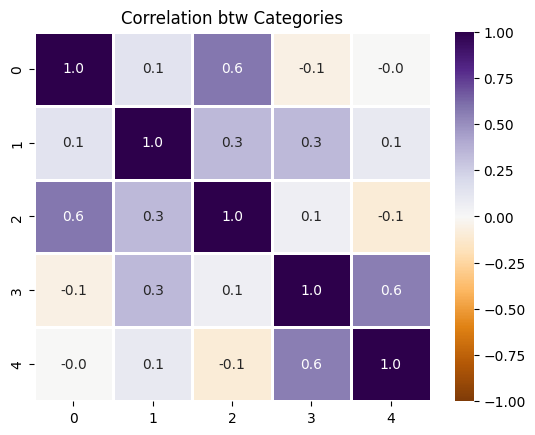

In [28]:
# study correlation between mass = 17, 63, 40, 85, and 28, which represent each category
df_rep = df.iloc[:,[17,63,40,85,28]].corr()
cust_labels = [str(i) for i in range(5)]

import seaborn as sns
import matplotlib.pyplot as plt
fig, axs = plt.subplots()
sns.heatmap(df_rep, annot=True, linewidths=1, cmap=plt.cm.PuOr, vmin=-1, vmax=1, xticklabels=cust_labels, yticklabels=cust_labels, fmt='.1f') # annot=False, linewidths=1, linecolor='w', cmap=plt.cm.bwr, vmin=-1, vmax=1
axs.set_title('Correlation btw Categories')
plt.show()

In [31]:
fig.savefig('image/correlation_cat.png')